In [49]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

In [51]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
customers_df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\Customers.csv")
transactions_df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\Transactions.csv")

In [54]:
customer_transactions = transactions_df.merge(customers_df, on="CustomerID", how="left")

In [55]:
customer_features = (
    customer_transactions.groupby("CustomerID")
    .agg(
        total_spending=("TotalValue", "sum"),
        total_transactions=("TransactionID", "count"),
        avg_transaction_value=("TotalValue", "mean"),
        region=("Region", "first"),
        signup_date=("SignupDate", "first"),
    )
    .reset_index()
)


In [56]:
customer_features_encoded = pd.get_dummies(customer_features, columns=["region"])

In [57]:
feature_columns = customer_features_encoded.columns.difference(["CustomerID", "signup_date"])
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features_encoded[feature_columns])

In [ ]:
cluster_results = {}
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(customer_features_scaled)
    db_index = davies_bouldin_score(customer_features_scaled, cluster_labels)
    cluster_results[k] = {"model": kmeans, "labels": cluster_labels, "db_index": db_index}

In [59]:
optimal_k = min(cluster_results, key=lambda k: cluster_results[k]["db_index"])
optimal_model = cluster_results[optimal_k]["model"]
optimal_labels = cluster_results[optimal_k]["labels"]
optimal_db_index = cluster_results[optimal_k]["db_index"]

In [60]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(customer_features_scaled)

In [61]:
clustering_result = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
clustering_result["Cluster"] = optimal_labels

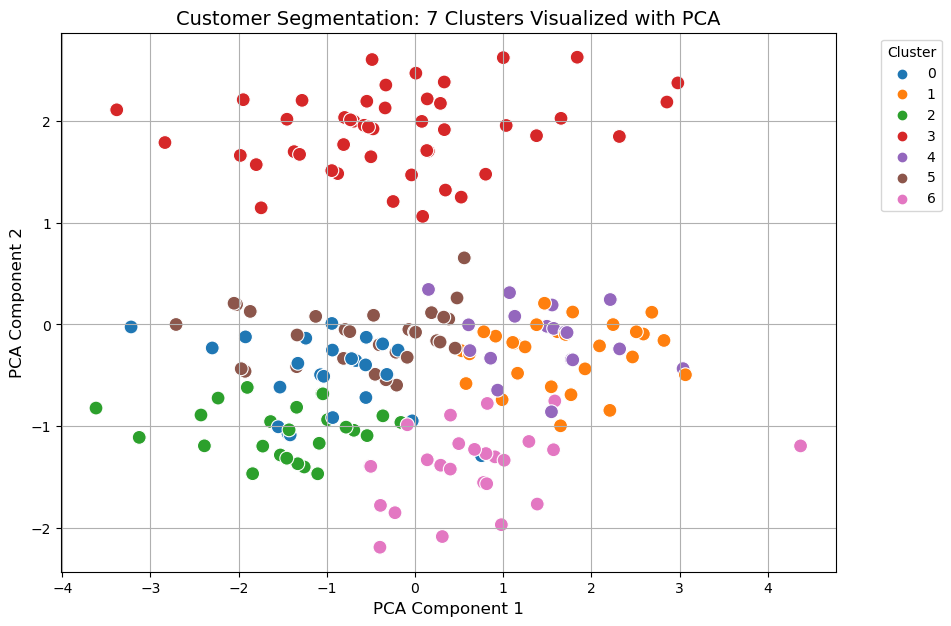

In [62]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=clustering_result, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=100)
plt.title(f"Customer Segmentation: {optimal_k} Clusters Visualized with PCA", fontsize=14)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

In [63]:
clustering_result.to_csv("C:\\Users\\ASUS\\Downloads\\Customer_Clusters.csv", index=False)

In [64]:
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {optimal_db_index}")


Optimal Number of Clusters: 7
Davies-Bouldin Index: 0.8465770594716062
